In [2]:
import igraph as ig
from qiskit import qpy
from qiskit.circuit import QuantumCircuit
import itertools
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram
import numpy as np

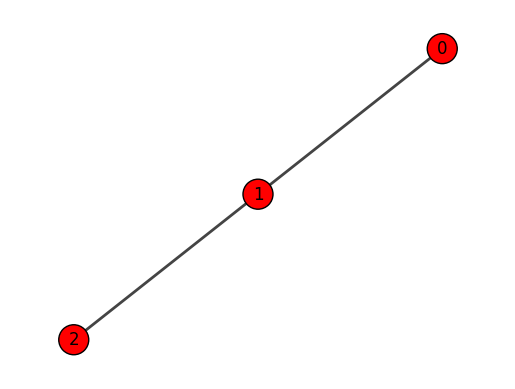

In [3]:
g = ig.Graph(n=3, directed=False)

edges = [(0,1), (1,2)]
g.add_edges(edges)
import matplotlib.pyplot as plt

g.vs["label"] = list(range(g.vcount()))

fig, ax = plt.subplots()
ig.plot(g, target=ax, vertex_label=g.vs["label"])

In [4]:
def find_vertexes_max_neigh(g):
    first_index = 0
    tot_neigh_num = 0

    second_indexes = [1]

    for i in g.vs:
        #biblioteka igraph liczy podwojna krawedz jako dwoch roznych saisadow wiec usuwam te same elementy z listy
        neigh_num = len(list(dict.fromkeys(g.neighbors(i))))

        if neigh_num > tot_neigh_num:
            tot_neigh_num = neigh_num
            first_index = i.index
            neighbors_v1 = set(g.neighbors(i, mode="all"))
            v1 = i

    tot_neigh_num = 0

    for k in neighbors_v1:
        #biblioteka igraph liczy podwojna krawedz jako dwoch roznych saisadow wiec usuwam te same elementy z listy
        neigh_num = len(list(dict.fromkeys(g.neighbors(k))))
        if neigh_num > tot_neigh_num:
            tot_neigh_num = neigh_num
            second_indexes.append(k)

    if second_indexes[-1] in neighbors_v1:
        neighbors_v1.remove(second_indexes[-1])

    return first_index, second_indexes[-1], list(neighbors_v1)

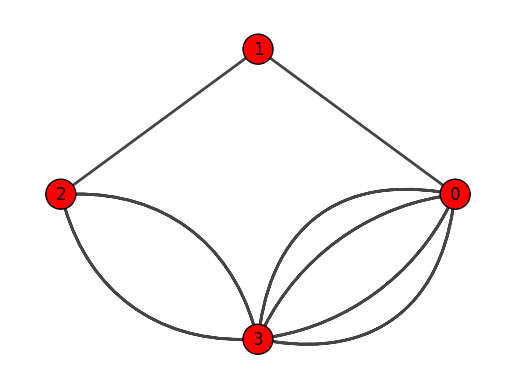

In [5]:
g2 = ig.Graph(n=4, directed=False)

edges2 = [(0, 1), (1, 2), (2, 3), (2, 3), (3, 0), (3, 0), (3, 0), (3, 0)]
g2.add_edges(edges2)
g2.vs["label"] = list(range(g2.vcount()))

fig, ax = plt.subplots()
ig.plot(g2, target=ax, vertex_label=g2.vs["label"])

In [6]:
first_vertex, second_vertex, v1_n = find_vertexes_max_neigh(g2)

In [7]:
first_vertex

0

In [8]:
second_vertex

1

In [9]:
def get_r(g):
    r_list = g.count_multiple(list(dict.fromkeys(g.get_edgelist())))

    r_nm_list = []

    for i, j in zip(list(dict.fromkeys(g.get_edgelist())), r_list):
        r_nm_list.append([i, j])
    return r_nm_list

In [10]:
list_r = get_r(g2)

In [11]:
list_r[0]

[(0, 1), 1]

In [12]:
first_vertex

0

In [13]:
G1 = ""

N = g2.vcount()

for i in range(N):
    if i == first_vertex:
        G1 += f'{i}.X '
    elif i == second_vertex:
        for j in list_r:
            if j[0] == (first_vertex, second_vertex):
                r12 = j[1]
        G1 += f'{i}.Z^{r12} '

In [14]:
for i in v1_n:
    for j in list_r:
        if j[0] == (first_vertex, i):
            print(j[0])
            r = j[1]
            G1 += f'{i}.Z^{r} '


(0, 3)


In [26]:
v1_n

[3]

In [16]:
G1

'0.X 1.Z^1 3.Z^4 '

In [27]:
v2_n = set(g2.neighbors(1, mode="all"))

In [28]:
v1_n

[3]

In [29]:
v2_n

{0, 2}

In [32]:
g3 = g2.permute_vertices([0,1,3,2])

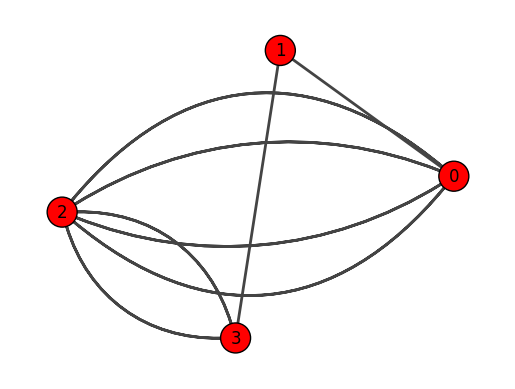

In [34]:
fig, ax = plt.subplots()
ig.plot(g3, target=ax, vertex_label=g2.vs["label"])